<a href="https://colab.research.google.com/github/Jothsna1234/Milk-Quality-Prediction/blob/main/Milk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("/content/drive/MyDrive/milknew.csv")
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [6]:
df.shape

(1059, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [8]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [9]:
df["Grade"].unique()

array(['high', 'low', 'medium'], dtype=object)

In [10]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df["Grade"]=le.fit_transform(df["Grade"])
df["Grade"].unique()

array([0, 1, 2])

In [11]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

<Axes: >

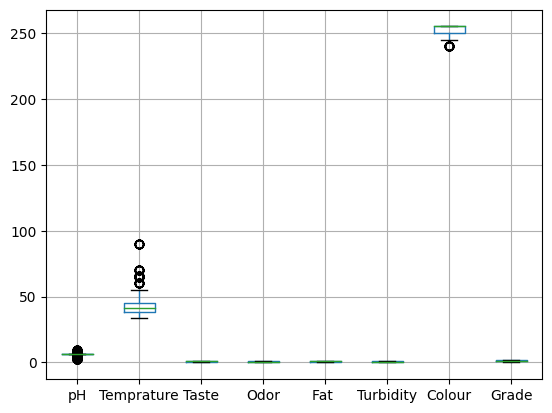

In [12]:
df.boxplot()

In [13]:
df.skew()

pH           -0.683904
Temprature    2.216739
Taste        -0.188058
Odor          0.272949
Fat          -0.730799
Turbidity     0.035940
Colour       -1.024902
Grade        -0.190728
dtype: float64

In [15]:
quantile1=df["Temprature"].quantile(0.25)
quantile2=df["Temprature"].quantile(0.75)
df["Temprature"]=np.where(df["Temprature"]<quantile1,quantile1,df["Temprature"])
df["Temprature"]=np.where(df["Temprature"]>quantile2,quantile2,df["Temprature"])

In [16]:
df["Temprature"].skew()

0.012990343902923886

In [17]:
quantile1=df["Colour"].quantile(0.25)
quantile2=df["Colour"].quantile(0.75)
df["Colour"]=np.where(df["Colour"]<quantile1,quantile1,df["Colour"])
df["Colour"]=np.where(df["Colour"]>quantile2,quantile2,df["Colour"])


In [18]:
co=round(df["Colour"].skew(),6)
print(co)

-0.440221


In [19]:
quantile1=df["pH"].quantile(0.25)
quantile2=df["pH"].quantile(0.75)
df["pH"]=np.where(df["pH"]<quantile1,quantile1,df["pH"])
df["pH"]=np.where(df["pH"]>quantile2,quantile2,df["pH"])


In [20]:
df["pH"].skew()

-0.10718318360422725

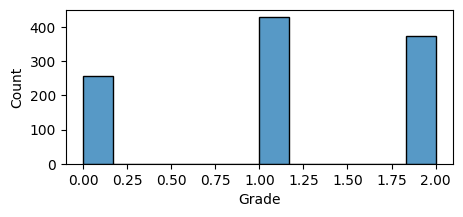

In [21]:
plt.figure(figsize=(5,2))
sns.histplot(df['Grade'])
plt.show()

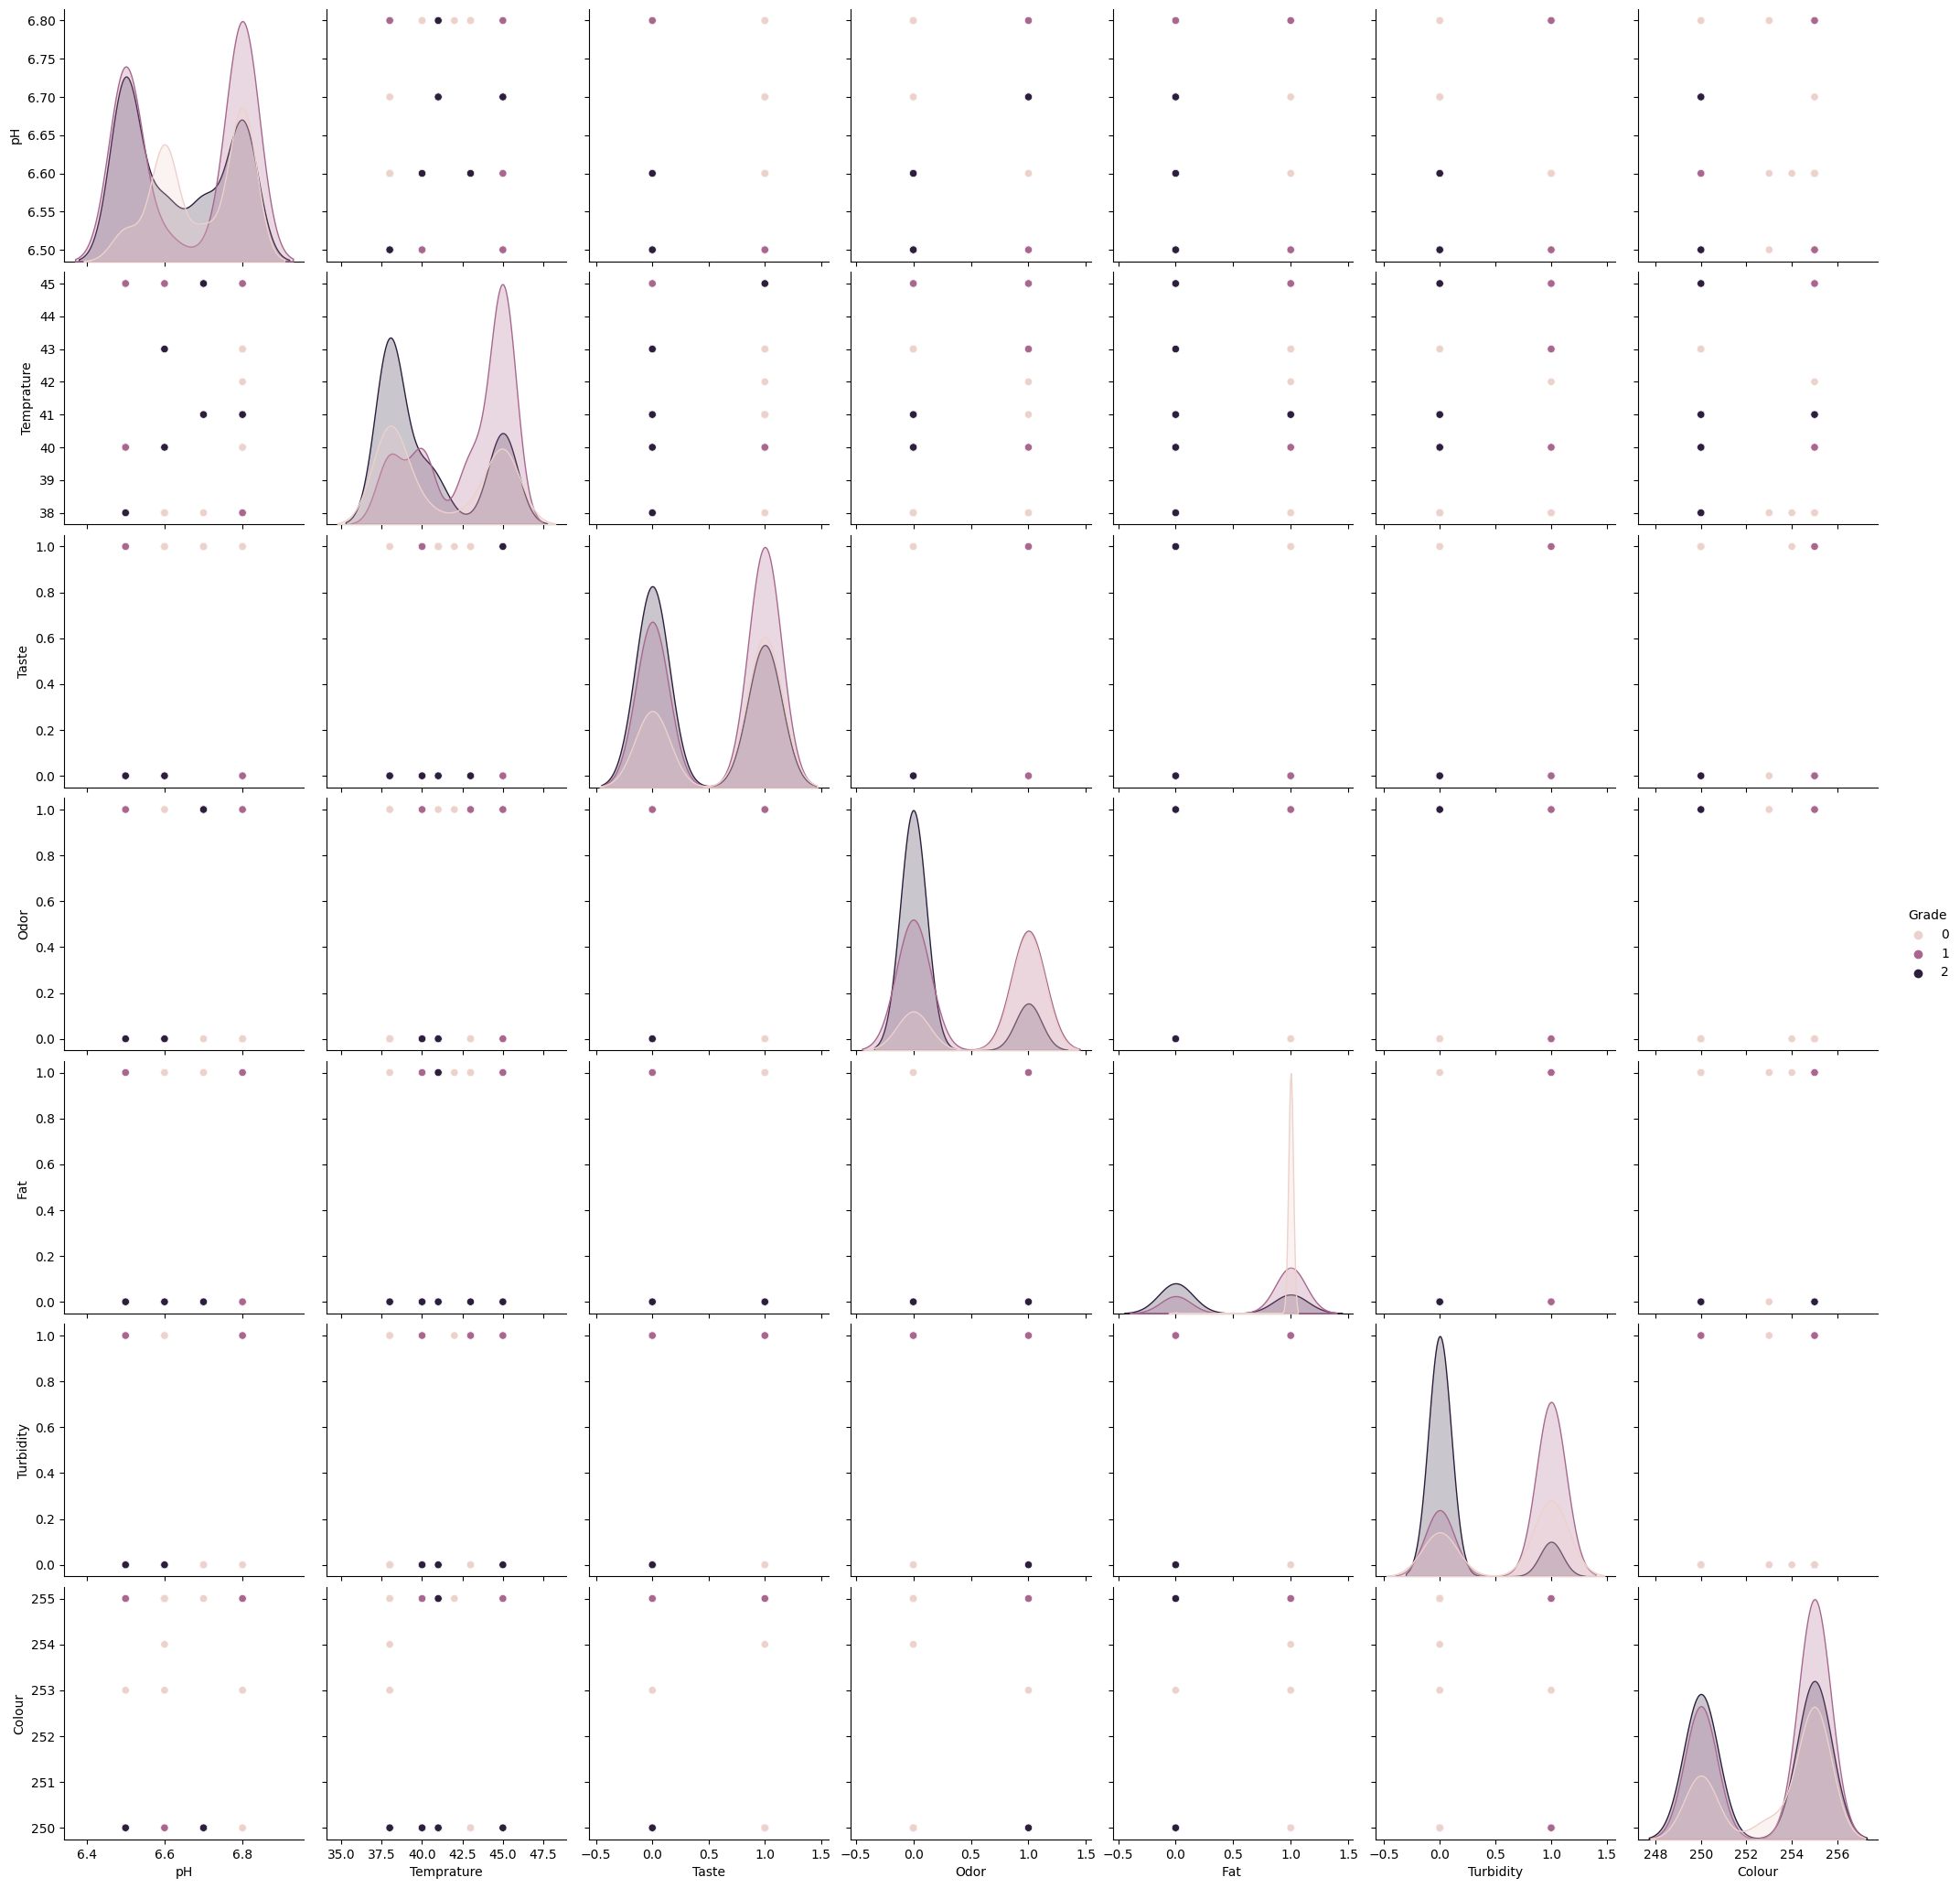

In [22]:
sns.pairplot(df,hue="Grade",height=3)

In [23]:
correlation=df.corr()
correlation

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
pH,1.000000,0.449949,-0.041844,0.099582,0.025048,0.106425,-0.149502,-0.163437
Temprature,0.449949,1.000000,-0.137448,0.205074,0.066164,0.295024,-0.352096,-0.126709
Taste,-0.041844,-0.137448,1.000000,0.017582,0.324149,0.055755,-0.114639,-0.197629
Odor,0.099582,0.205074,0.017582,1.000000,0.314505,0.457935,-0.005736,-0.454609
Fat,0.025048,0.066164,0.324149,0.314505,1.000000,0.329264,0.034812,-0.501070
Turbidity,0.106425,0.295024,0.055755,0.457935,0.329264,1.000000,0.020945,-0.428017
Colour,-0.149502,-0.352096,-0.114639,-0.005736,0.034812,0.020945,1.000000,-0.121692
Grade,-0.163437,-0.126709,-0.197629,-0.454609,-0.501070,-0.428017,-0.121692,1.000000


In [25]:
y= df["Temprature"]

In [26]:
X= df.drop("Temprature", axis = 1)
X

,pH,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,1,0,1,0,254.0,0
1,6.6,0,1,0,1,253.0,0
2,6.8,1,1,1,1,250.0,1
3,6.8,1,1,0,1,255.0,1
4,6.6,0,0,0,0,255.0,2
...,...,...,...,...,...,...,...
1054,6.7,1,1,0,0,250.0,2
1055,6.7,1,0,1,0,255.0,0
1056,6.5,1,1,1,1,255.0,1
1057,6.8,1,0,1,0,250.0,0


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    X,y,train_size = 0.80, 
    random_state = 1)
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [28]:
lr.score(X_test, y_test).round(3)

0.386

In [31]:
lr.score(X_train, y_train).round(3)

0.385

In [30]:
y_pred = lr.predict(X_test)

In [32]:
data_new = X_train[:1]

lr.predict(data_new)

y_train[:1]

56    45.0
Name: Temprature, dtype: float64

In [33]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)
GaussianNB()
y_pred=model.predict(X_test)
y_pred.shape
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.5424528301886793